# Project Title : Classify products into the correct category

#### Course Number: MADS 1921
#### Leturer: Peter Roßbach 
#### Course Title: Intro to Data Analytics in Business 
#### Date: Nov 21, 2019 


Group members: 
    
    Gabriel Di Leo Safta
    Marius Andersen
    Shaikh Muhammad Asjad Raza
    

# Description

The Otto Group is one of the world s biggest e-commerce companies, with subsidiaries in more than
20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are
selling millions of products worldwide every day, with always new products being added to the
product line.

A consistent analysis of the performance of the products is crucial. However, due to the diverse
global infrastructure, many identical products get classified differently. Therefore, the quality of the
product analysis depends heavily on the ability to accurately cluster similar products. The better the
classification, the more insights Otto can generate about the product range.

Scenario

The objective is to build a predictive model which is able to classify products into the correct
category. There are nine categories for all products. Each target category represents one of the most
important product categories (like fashion, electronics, etc.).

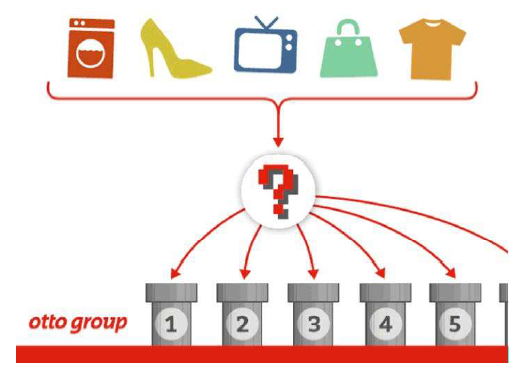

# Data

For the task a dataset is provided in the form of a csv file (ClassifyProducts.csv) with 93 features for
more than 200,000 products. The data contains the following features:

    id > an anonymous id unique to a product
    feat_1, feat_2, ..., feat_93 > the various features of a product
    target > the class of a product

# We start by installing some dependencies 

In [2]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# import warnings filter and ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Load the data

In [3]:
df = pd.read_csv("ClassifyProducts.csv")

# Data Preprocessing

We find the data frames to large to visualize with default settings from pandas so we create a custom function to display all entries whenever necessary. However for the purpose of presenting the results, we avoid using the funciton.

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [6]:
# Number of Rows,Columns
df.shape

(61878, 95)

### Check for missing values

In [7]:
#The percentage of data missing from each column
df.isnull().sum().sort_index()/len(df)

feat_1     0.0
feat_10    0.0
feat_11    0.0
feat_12    0.0
feat_13    0.0
          ... 
feat_91    0.0
feat_92    0.0
feat_93    0.0
id         0.0
target     0.0
Length: 95, dtype: float64

The dataset has no missing values

In [8]:
df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


Since the data is encoded, there is not much meaning to derive from the features distribution at this stage 

In [9]:
# Let us take a look at the Target and count its unique values to find any imbalances  
df['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

There are imbalances in the Target Class

Before we continue we can simply convert the target into a numerical column. We can take advantage that we can simply extract the 6th elementh of the string which is equivalent to the class

In [10]:
df['target'][0][6] 

'1'

However, we have read on some formus online that some models require labels to be econded starting with 0 (such as gradient boosted trees)
So instead of the manual encoding above, we would use the standard scikit learn methods 

In [11]:
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])

In [12]:
df[['target', 'target_encoded']]

,target,target_encoded
0,Class_1,0
1,Class_1,0
2,Class_1,0
3,Class_1,0
4,Class_1,0
...,...,...
61873,Class_9,8
61874,Class_9,8
61875,Class_9,8
61876,Class_9,8


In [13]:
# Lets drop the ID column which is unecessary
df = df.drop('id', axis = 1)

### Let's normalize the data to fit between 0 and 1 

In [14]:
# before  normalization
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target,target_encoded
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Class_1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Class_1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Class_1,0
3,1,0,0,1,6,1,5,0,0,1,...,1,2,0,0,0,0,0,0,Class_1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Class_1,0


In [15]:
# This will be the subset to normalize
df.iloc[:,0:93].head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [16]:
from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()

In [17]:
#we want to normalize all but the target column
df.iloc[:,0:93] = nscaler.fit_transform(df.iloc[:,0:93])

In [18]:
# after normalization
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target,target_encoded
0,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
3,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,0.033333,...,0.015385,0.029851,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.007692,0.0,0.0,0.0,Class_1,0


# Exploratory Data Analysis

With almost 100 features, we may need some dimentionality reduction.
The goal of dimensionality reduction is to simplify the data without losing too much information. One way to do this is to merge several correlated features into one, or discard highly correlated features to avoid multicolliniarity.

# Principal Component Analysis
With PCA we make a projection of the data into a lower dimension, by identifying principal components (linear combinations of the original features) which explains the most variance in the data

In [19]:
X = df.drop(['target','target_encoded'], axis = 1) ;X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,0.033333,...,0.289474,0.000000,0.015385,0.029851,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.0,0.007692,0.0,0.0,0.0


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)

In [22]:
x_pca.shape

(61878, 2)

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

Text(0, 0.5, 'Second Principal Component')

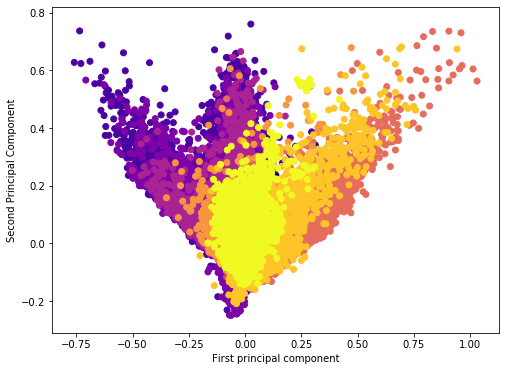

In [23]:
# We need a lable for the classess!!!!!!!!!!!!!!!!!
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['target_encoded'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

This chart shows each intances of the target class in different colors maped to the value of two principal components. 
We see a beautiful pattern showing some structure or culsters in the data. The practical insigth out of this: 
    
    - As expected, we wont be able to classify the data simply using 2 principal components 
    - the structure raises the suspision that perhaps the some of the features are hihgly correlated. Think of multicolinarity or that one of the feature is a function of the other. Since the data is encoded, we do not know, but we will measure correlations later to check this.
    

If we wanted to know what variables are influencing each principal component we could create a dataframe with the 2 principal components per feature and visualize the relationship with a heatmap. 

In [24]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns); df_comp

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,-0.011551,0.040620,0.204705,0.145473,0.01049,0.007707,0.021641,0.003092,-0.022126,0.019104,...,0.005565,-0.009926,-0.071111,0.011164,-0.175870,0.039210,0.029938,0.013607,0.051174,0.005111
1,0.016211,0.015729,0.109714,0.081559,0.00935,0.001124,0.010137,-0.012107,-0.165605,0.024564,...,0.001826,0.054952,0.031495,0.013550,0.092144,0.052483,-0.008195,0.001985,0.074492,0.002558


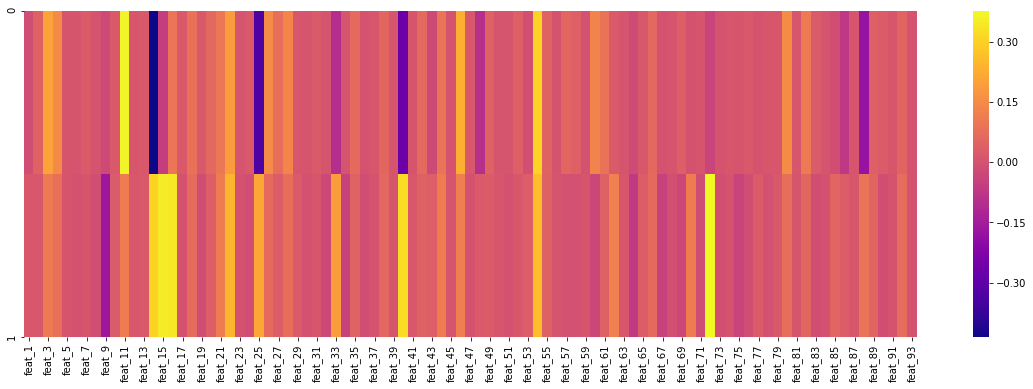

In [25]:
plt.figure(figsize=(20,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. So we know we could say that the principal component 2 (index 1) is somewhat determined by features 14, 15, 16 , 40 and above all feature 70. 

The object variable explained_variance_ratio_ contains the amount of variance that each
principal component explains. Using the cumsum function, we can cumulate the variances and
plot the function

In [26]:
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

In [27]:
cum_var

array([11.74, 20.88])

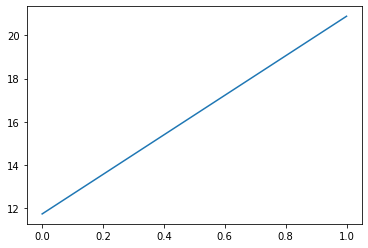

In [28]:
plt.plot(cum_var)

2 principal components explain just about 20% of the variance in the data. We need more principal components

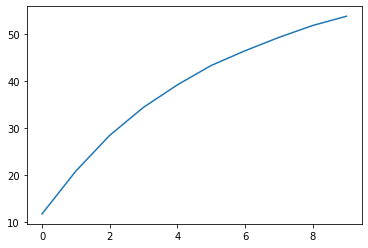

In [29]:
pca = PCA(n_components=10)
pca.fit(X)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.plot(cum_var)

10 principal components explain just over 50% of the variance. We still need more principal components 

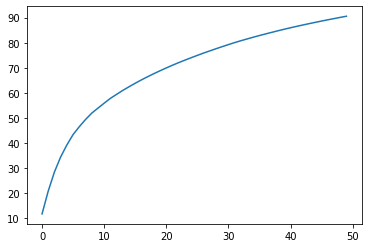

In [30]:
# We repeat with 50 and reduce accordingly
pca = PCA(n_components=50)
pca.fit(X)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.plot(cum_var)

We can only reduce in half the amount of variables without compromising to much on variance (90%)

In [31]:
var

array([0.11739798, 0.09136774, 0.07605835, 0.05982369, 0.04779219,
       0.04141822, 0.0313282 , 0.02854902, 0.02543538, 0.01993731,
       0.01982088, 0.01924156, 0.01604894, 0.01584925, 0.0145337 ,
       0.01399371, 0.01341421, 0.01262501, 0.01222044, 0.01164247,
       0.01117037, 0.01089165, 0.01028019, 0.00992566, 0.00955666,
       0.00935031, 0.00922146, 0.00862974, 0.0085526 , 0.00838335,
       0.00813602, 0.00799176, 0.00741182, 0.00709831, 0.00702066,
       0.00665589, 0.00645905, 0.00633204, 0.00627201, 0.0060612 ,
       0.00576384, 0.00563908, 0.00549751, 0.00525746, 0.00518875,
       0.0051474 , 0.00498347, 0.00482215, 0.0047811 , 0.00457978])

In [32]:
pca_X = pca.fit_transform(X)

In [33]:
pca_X

array([[ 0.05983884, -0.08244965,  0.00238994, ..., -0.00820114,
        -0.00495899,  0.00696071],
       [ 0.00579287, -0.11827249,  0.02798157, ...,  0.01134435,
         0.01447294,  0.00905441],
       [-0.00432255, -0.10832701,  0.03349229, ..., -0.01581887,
        -0.00521163, -0.0054595 ],
       ...,
       [-0.03432112, -0.05947609,  0.06705313, ..., -0.07234483,
        -0.0379905 , -0.00499679],
       [ 0.03869195, -0.02149078,  0.01707524, ...,  0.01392272,
         0.0240774 , -0.01067694],
       [ 0.06667974, -0.02205649,  0.02575544, ..., -0.01613091,
         0.002464  , -0.01194027]])

This PCA method returns an np array but we need a data frame to run our models, so we create it accordinlgy

In [34]:
# Create a list with column names
pc = []
for i in range(1,51):
    pc.append('principal_component_{}'.format(i))

In [35]:
pc[:5]

['principal_component_1',
 'principal_component_2',
 'principal_component_3',
 'principal_component_4',
 'principal_component_5']

In [36]:
pca_df = pd.DataFrame(pca_X, columns= pc)

In [37]:
pca_df['target_encoded'] = df['target_encoded']

In [38]:
pca_df

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,...,principal_component_42,principal_component_43,principal_component_44,principal_component_45,principal_component_46,principal_component_47,principal_component_48,principal_component_49,principal_component_50,target_encoded
0,0.059839,-0.082450,0.002390,0.104756,-0.140693,-0.152771,0.056564,-0.041725,0.079329,0.056606,...,-0.008331,0.006257,0.008486,0.014482,0.001089,-0.007472,-0.008201,-0.004959,0.006961,0
1,0.005793,-0.118272,0.027982,-0.035712,-0.044607,0.022820,-0.014501,0.004746,-0.030366,-0.009237,...,0.006941,-0.014751,-0.024069,-0.014015,-0.001296,0.017503,0.011344,0.014473,0.009054,0
2,-0.004323,-0.108327,0.033492,-0.021839,-0.036597,0.028902,-0.024731,0.014531,-0.007322,-0.020437,...,-0.006833,0.003856,-0.008495,0.000335,0.020384,0.010879,-0.015819,-0.005212,-0.005459,0
3,0.067025,-0.033089,-0.010041,0.051900,0.008375,0.057196,-0.020153,0.050959,0.023617,0.074063,...,0.072728,-0.078647,-0.039290,0.171697,-0.001923,0.008011,0.175494,0.063153,0.096807,0
4,0.005283,-0.114902,0.033427,-0.004347,-0.045833,0.032003,-0.051140,0.053790,0.003987,0.022040,...,-0.001033,-0.001770,0.005862,0.030796,-0.002763,-0.003225,0.012379,0.002853,-0.006312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,0.096908,0.341620,0.003592,0.432899,0.057554,-0.103738,-0.388838,0.280131,-0.011363,-0.126305,...,0.123203,-0.057292,-0.027855,-0.258337,0.014080,-0.103078,-0.065584,0.138453,0.037591,8
61874,-0.047299,-0.049774,-0.005990,0.059452,-0.029966,0.022683,-0.127537,0.137204,0.103703,0.078716,...,0.040729,-0.028638,0.020056,0.005186,0.021460,0.033584,-0.014026,-0.005387,-0.003010,8
61875,-0.034321,-0.059476,0.067053,0.019873,0.008872,0.023193,-0.057781,0.025800,0.071465,-0.085047,...,0.014478,-0.023247,-0.045648,-0.014576,-0.029663,0.014212,-0.072345,-0.037991,-0.004997,8
61876,0.038692,-0.021491,0.017075,0.057083,-0.077585,-0.078651,-0.171163,0.090053,-0.022427,-0.067178,...,-0.045316,-0.003004,0.018340,-0.053419,0.005209,-0.019313,0.013923,0.024077,-0.010677,8


We will use this data frame later for training models

# Correlation Analysis among the features

It could be that features are unbalanced if many of them are highly correlated (meaningn not only linear correlation)
At least we can check for linear correlation. Perhaps we can eliminate highly correlated variables

Visualizing the full correlation matrix is unecessary because there are too many features. We just experiment visualization with the most significant variables


From raw feature importance analysis carried out with Random Forest we found the following to be the most significant features: 

    feat_34	0.105458
    feat_11	0.038624
    feat_60	0.031875
    feat_14	0.026691
    feat_25	0.024341
    
Lets visulaize the correlation among them

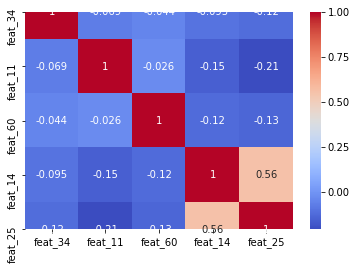

In [39]:
cols = ['feat_34','feat_11','feat_60','feat_14','feat_25']
df[cols].head()
sns.heatmap(df[cols].corr(),cmap='coolwarm',annot=True)

Visual tools are not helping us much with this problem. We need to evaluate the full correlation matrix 

In [40]:
abs_corr = X.corr().abs()

In [41]:
abs_corr

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,1.000000,0.031332,0.027807,0.027529,0.042973,0.043603,0.298952,0.056321,0.032285,0.097776,...,0.049634,0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,0.025630,0.051925,...,0.009845,0.006764,0.039090,0.047451,0.047035,0.105527,0.515022,0.026383,0.008219,0.054593
feat_3,0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,0.053462,0.063551,0.036944,...,0.011159,0.048626,0.096093,0.009838,0.082336,0.174781,0.015068,0.012417,0.066921,0.006814
feat_4,0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,0.046184,0.046250,0.059514,...,0.005684,0.033153,0.071029,0.005055,0.067484,0.183715,0.009454,0.010312,0.087631,0.015746
feat_5,0.042973,0.020926,0.010880,0.017290,1.000000,0.145355,0.075047,0.035861,0.024708,0.091324,...,0.467329,0.034062,0.013879,0.013999,0.019201,0.119951,0.004842,0.012012,0.065331,0.002038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_89,0.096851,0.105527,0.174781,0.183715,0.119951,0.035042,0.063511,0.007974,0.019147,0.061498,...,0.103643,0.053582,0.011822,0.066008,0.022552,1.000000,0.027764,0.015917,0.129622,0.030650
feat_90,0.010310,0.515022,0.015068,0.009454,0.004842,0.054034,0.129578,0.026807,0.020698,0.049908,...,0.006013,0.003931,0.019803,0.014696,0.031679,0.027764,1.000000,0.014812,0.035311,0.039864
feat_91,0.037264,0.026383,0.012417,0.010312,0.012012,0.012465,0.068506,0.095990,0.014742,0.024025,...,0.003444,0.023091,0.024005,0.028850,0.033653,0.015917,0.014812,1.000000,0.104226,0.000045
feat_92,0.054777,0.008219,0.066921,0.087631,0.065331,0.015479,0.032261,0.013608,0.069707,0.006869,...,0.048431,0.043484,0.049393,0.001424,0.070120,0.129622,0.035311,0.104226,1.000000,0.003653


In [42]:
abs_corr.unstack()

feat_1   feat_1     1.000000
         feat_2     0.031332
         feat_3     0.027807
         feat_4     0.027529
         feat_5     0.042973
                      ...   
feat_93  feat_89    0.030650
         feat_90    0.039864
         feat_91    0.000045
         feat_92    0.003653
         feat_93    1.000000
Length: 8649, dtype: float64

For presentation purpose we do not run this cell which would make the output excessively large
    
    display_all(abs_corr.unstack().sort_values(ascending = False).head(200))

The most lineraly correlated features in absolute terms outside of the diagonal are:

    feat_39  feat_45    0.824146
    feat_45  feat_39    0.824146
    feat_46  feat_3     0.777517
    feat_3   feat_46    0.777517
    feat_15  feat_72    0.764664
    feat_72  feat_15    0.764664
    feat_30  feat_84    0.716862
    feat_84  feat_30    0.716862
    feat_64  feat_9     0.702951
    feat_9   feat_64    0.702951
    feat_3   feat_54    0.694048
    feat_54  feat_3     0.694048
    feat_77  feat_29    0.612847

The maximum absolute value of the linear correlations among variables is 0.82. We see no reason to discard any variable

# Feature Engineering 

We try feature engineering new columns containing 

    the sum of each element in a row,
    the mean of each element in a row,
    the variance of each element in a row,
    the count of non 0 element per features in a row

In [43]:
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target,target_encoded
0,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
3,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,0.033333,...,0.015385,0.029851,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1,0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.007692,0.0,0.0,0.0,Class_1,0


In [44]:
col_list = list(df.drop(['target','target_encoded'], axis = 1).columns)

In [45]:
df['feat_sum'] = df[col_list].sum(axis=1)

In [46]:
df['feat_mean'] = df[col_list].mean(axis=1)

In [47]:
df['feat_variance'] = df[col_list].var(axis=1)

In [48]:
# Count non zeros
df['feat_count_non_zero'] = df[col_list].astype(bool).sum(axis=1)

In [49]:
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_90,feat_91,feat_92,feat_93,target,target_encoded,feat_sum,feat_mean,feat_variance,feat_count_non_zero
0,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,Class_1,0,1.076775,0.011578,0.001167,23
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.0,0.0,0.0,Class_1,0,0.185288,0.001992,0.000070,10
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.0,0.000000,...,0.000000,0.0,0.0,0.0,Class_1,0,0.275158,0.002959,0.000110,8
3,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.0,0.033333,...,0.000000,0.0,0.0,0.0,Class_1,0,2.774443,0.029833,0.006960,38
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.007692,0.0,0.0,0.0,Class_1,0,0.500142,0.005378,0.000486,11


# Downsampling

We clearly have an unbalanced dataset as a few target classes are significantly over represented

In [50]:
df['target'].value_counts()/len(df)

Class_2    0.260545
Class_6    0.228433
Class_8    0.136785
Class_3    0.129351
Class_9    0.080077
Class_7    0.045881
Class_5    0.044265
Class_4    0.043489
Class_1    0.031174
Name: target, dtype: float64

Class 2 and 6 account for almost half of the total observations

We are interested in analysing how sensitive the result of models are to the possible data subsampling metod applied.
Lets work with 4 data sets, the full dataset, the downsampled dataset and two hybrids that we define later.




In [51]:
# We already defined the fetures matrix X, now we defin the encoded target as y
y = df['target_encoded']

In [52]:
# We create a custom function to do subsampling 

def subsample(y, size=None, random_state=None, upsample=False):
    # returns a List with randomly chosen index numbers to sample
    # y is the target feature
    # size is the number of samples per class, default size = min class size, ie. downsampling
    # if upsample == True, it will upsample the underweighted classes to create a sample size == size 
    subsample = []
    if size is None:
        n_smp = y.value_counts().min()
    else:
        n_smp = int(size)
    if not random_state is None:
        np.random.seed(random_state)
    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        if len(samples) < n_smp:
            if upsample==False:
                indexes = np.random.choice(index_range, size=len(samples), replace=False)
            else: 
                indexes = np.random.choice(index_range, size=n_smp, replace=True)
        else:
            indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()
    return subsample

#### Full dataset

In [53]:
df_full = df
df_full['target_encoded'].value_counts()

1    16122
5    14135
7     8464
2     8004
8     4955
6     2839
4     2739
3     2691
0     1929
Name: target_encoded, dtype: int64

#### mid_up Dataset 
We want the median number of target classes. Those with less than that should be boostrapped / upsampled
We could also upsample the underweighted classes to match the size of the meadian class

In [54]:
size = int(df['target_encoded'].value_counts().median())
rows = subsample(y,size=size, random_state=0,upsample=True)
df_mid_up = df.iloc[rows,:]
df_mid_up['target_encoded'].value_counts()

8    4955
7    4955
6    4955
5    4955
4    4955
3    4955
2    4955
1    4955
0    4955
Name: target_encoded, dtype: int64

In [55]:
# Doing this subsampling leave us with around 70% of the data
len(df_mid_up)/len(df)

0.7206923300688451

# Mid Dataset

We want the median number of target classes. We can just trim the overweighted classes. 
Those with less than the median should remain under represented

In [56]:
size = int(df['target_encoded'].value_counts().median())
rows = subsample(y,size=size, random_state=0,upsample=False)
df_mid = df.iloc[rows,:]
df_mid['target_encoded'].value_counts()

8    4955
7    4955
5    4955
2    4955
1    4955
6    2839
4    2739
3    2691
0    1929
Name: target_encoded, dtype: int64

In [57]:
# Doing this subsampling leave us with around 50% of the data
len(df_mid)/len(df)

0.5651927987329908

# Downsampled Dataset

We want as many number of target classes as the class with the minimum number

In [58]:
rows = subsample(y, random_state=0)
df_down = df.iloc[rows,:]
df_down['target_encoded'].value_counts()

8    1929
7    1929
6    1929
5    1929
4    1929
3    1929
2    1929
1    1929
0    1929
Name: target_encoded, dtype: int64

In [59]:
# Doing downsampling leave us with around 30% of the data
len(df_down)/len(df_full)

0.28056821487443034

In [60]:
# Now we make a list of the datasets
data_sets = [df_full , df_mid_up , df_mid , df_down]

In [61]:
for i in data_sets:
    print(len(i))

61878
44595
34973
17361


In [62]:
# X , Y split

Y_full = df_full['target_encoded']
X_full = df_full.drop(['target','target_encoded'], axis = 1)

Y_mid_up = df_mid_up['target_encoded']
X_mid_up = df_mid_up.drop(['target','target_encoded'], axis = 1)

Y_mid = df_mid['target_encoded']
X_mid = df_mid.drop(['target','target_encoded'], axis = 1)

Y_down = df_down['target_encoded']
X_down = df_down.drop(['target','target_encoded'], axis = 1)


In [63]:
# Train test splits
from sklearn.model_selection import train_test_split

In [64]:
X_train_full, X_test_full, Y_train_full, Y_test_full = train_test_split(X_full, Y_full, test_size = 0.20, random_state = 0)
X_train_mid_up, X_test_mid_up, Y_train_mid_up, Y_test_mid_up = train_test_split(X_mid_up, Y_mid_up, test_size = 0.20, random_state = 0)
X_train_mid, X_test_mid, Y_train_mid, Y_test_mid = train_test_split(X_mid, Y_mid, test_size = 0.20, random_state = 0)
X_train_down, X_test_down, Y_train_down, Y_test_down = train_test_split(X_down, Y_down, test_size = 0.20, random_state = 0)

# Classification Models

We create an instance of each model as suggested in the script 

In [65]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)

In [67]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0)

In [70]:
from sklearn.neural_network import MLPClassifier
nnetmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(17,), random_state=0)

In [71]:
from sklearn.svm import SVC
LinSVCmodel = SVC(kernel='linear', C=10, random_state=0)

We make a list of models to iterate through a custom function that will do all steps in the cross validation process

In [72]:
models = [lrmodel, knnmodel, nbmodel, rfmodel, gbmodel, nnetmodel, LinSVCmodel]

Lets look at the models description

In [73]:
models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                      weights='uniform'),
 GaussianNB(priors=None, var_smoothing=1e-09),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, ra

We create a report data frame to store the results of our analysis

In [74]:
report = pd.DataFrame(columns=['Model','Mean Acc. Training','Acc. Standard Deviation Training','Acc. Test'])

Now we define a custom function with all steps in the cross validation process 

In [75]:
#A function to do all steps for each model
def run_model(model,X_train,X_test,Y_train,Y_test):
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv = 10)
    acc_mean = accuracies.mean()
    acc_std = accuracies.std()
    model.fit(X_train, Y_train)
    Y_test_pred = model.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    model_name = type(model).__name__
    report.loc[len(report)] = [model_name, accuracies.mean(),accuracies.std(), accte, ]

The function takes as input a given model and the respective data set partitions. 

The first step is to calculate the cross validation. The parameter scoring defines the scoring measure and cv the number of k folds of cross validation. In our case, the training set is splitted into 10 parts and for every of the 10 combinations a model is calculated and evaluated with the accuracy. Thus, the result consists of 10 accuracy values which are the
scores of the 10 test folds (not the test sample)

To measure the quality of the algorithm, we compute the mean and the standard deviation of
the accuracies

Then we have to evaluate the quality of the model applied to the real test data which was not used by the model until now

Finally we add the results to the report dataframe

In [76]:
# we can get the model name direclty from the model object like this
for m in models: 
    print(type(m).__name__)

LogisticRegression
KNeighborsClassifier
GaussianNB
RandomForestClassifier
GradientBoostingClassifier
MLPClassifier
SVC


# Using each resampled datasets we iterate throught each model

    for m in models: 
        run_model(m,X_train,Y_train,X_test,Y_test)
        
As you can imagine, this was efficient in code, but the computation took enormus time, so we train them in google coolab and made a screenshot of the results

### df_down

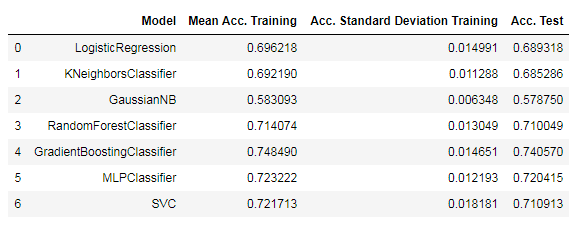

### df_mid

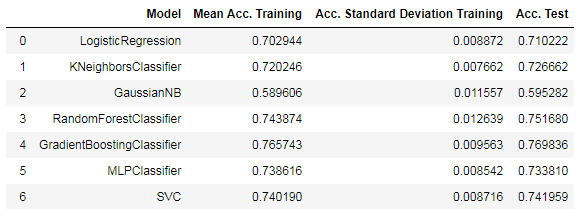

### df_mid_up

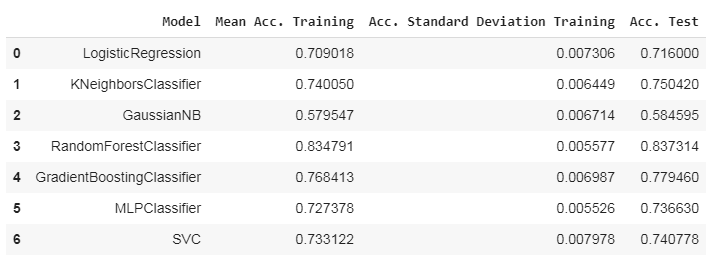

### df_full

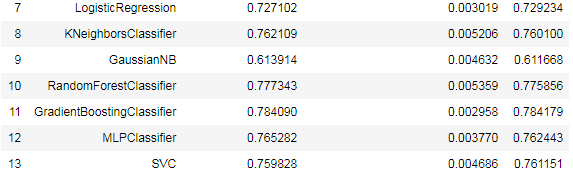

### Insight

The results do not show any significant difference as to which subsample technique we use. As a result we focust on the subsample dataset for efficiency purposes. 

# Additional Models

We decided to explore models beyond the ones reviewed in class. 

# Extra Trees

This model creates extra uncorrelated but weak individual trees, which together should yield a good prediction, as the errors terms cancel out.

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
m = ExtraTreesClassifier(n_estimators=100, min_samples_leaf=1, max_features=0.5, n_jobs=-1)

In [83]:
%time m.fit(X_train_down, Y_train_down)

Wall time: 1.85 s


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=0.5, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [84]:
Y_test_pred = m.predict(X_test_down)
accte = accuracy_score(Y_test_down, Y_test_pred)


In [85]:
# the accuracy is not bad
accte

0.7791534696228045

In [86]:
# We will use this again later
extra_trees_y_test = Y_test_down
extra_trees_y_pred = Y_test_pred

# XGBOOST 

In [87]:
import xgboost as xgb

In [88]:
xgbc = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [89]:
xgbc.fit(X_train_down, Y_train_down)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
Y_test_pred = xgbc.predict(X_test_down)
accuracy_score(Y_test_down, Y_test_pred)

0.6887417218543046

# Run models on PCA modified sets

In [91]:
# First we downsample the PCA df
rows = subsample(y, random_state=0)
pca_df_down = pca_df.iloc[rows,:]
pca_df_down['target_encoded'].value_counts()

8    1929
7    1929
6    1929
5    1929
4    1929
3    1929
2    1929
1    1929
0    1929
Name: target_encoded, dtype: int64

In [92]:
# X , Y split
Y_pca_down = pca_df_down['target_encoded']
X_pca_down = pca_df_down.drop('target_encoded', axis = 1)

In [93]:
pca_X_train_down, pca_X_test_down, pca_Y_train_down, pca_Y_test_down = train_test_split(X_pca_down, Y_pca_down, test_size = 0.20, random_state = 0)

In [94]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_features=0.5, n_jobs=-1)

In [95]:
pca_accuracies = cross_val_score(rf, pca_X_train_down, pca_Y_train_down, scoring='accuracy', cv = 10)  

In [96]:
pca_acc_mean = pca_accuracies.mean()
pca_acc_std = pca_accuracies.std()

In [97]:
rf.fit(pca_X_train_down, pca_Y_train_down)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [98]:
Y_test_pred = rf.predict(pca_X_test_down)
accte = accuracy_score(pca_Y_test_down, Y_test_pred)

In [99]:
report = pd.DataFrame(columns=['Model','Mean Acc. Training','Acc. Standard Deviation Training','Acc. Test'])
report.loc[len(report)] = ['rf_pca', pca_accuracies.mean(),pca_accuracies.std(), accte, ]

In [100]:
report

,Model,Mean Acc. Training,Acc. Standard Deviation Training,Acc. Test
0,rf_pca,0.72063,0.011591,0.71264


#### Insight

Not bad. We have tried several models with the default settings and they have performed well. The next would be to select some interesting ones and try grid search for hyperparameter tuning. Hoever, before we do that it is worth thinking about what exactly we want to achieve 

# Clasification Perfromance Measurements

Lets take the example of the Extra Trees model above. We focused on accuracy so far but we have not analyzed how that accuracy is achieved. For that we can take a look at the confusion matrix

### Confusion Matrix



Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

In [101]:
print(confusion_matrix(extra_trees_y_test, extra_trees_y_pred))

[[277   2   3   1   1   8  13  18  53]
 [  1 245  79  29   1   1  16   2   1]
 [  0 104 249  42   0   0  19   1   1]
 [  4  39  43 295   3   6  11   0   1]
 [  4   0   2   0 373   0   1   0   2]
 [ 15   2   0   4   0 312  15   8   5]
 [ 18  12  34   7   5  10 299   7   0]
 [ 29   2   1   0   1   1   5 334   5]
 [ 35   1   2   1   1   9   6  14 322]]


In [102]:
# We can use a function to decorate it a bit 

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    '''
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
'''
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

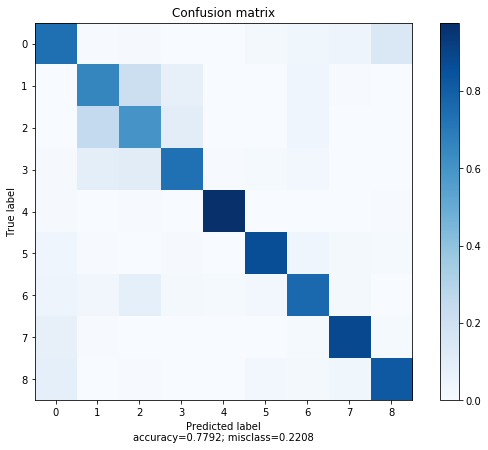

In [103]:
plot_confusion_matrix(confusion_matrix(extra_trees_y_test, extra_trees_y_pred))

In [104]:
print(confusion_matrix(extra_trees_y_test, extra_trees_y_pred))

[[277   2   3   1   1   8  13  18  53]
 [  1 245  79  29   1   1  16   2   1]
 [  0 104 249  42   0   0  19   1   1]
 [  4  39  43 295   3   6  11   0   1]
 [  4   0   2   0 373   0   1   0   2]
 [ 15   2   0   4   0 312  15   8   5]
 [ 18  12  34   7   5  10 299   7   0]
 [ 29   2   1   0   1   1   5 334   5]
 [ 35   1   2   1   1   9   6  14 322]]


Regardles of the model we use, we have found always the same pattern of missclassifications 

# f1 metric for imbalanced datasets 

So far we have used accuracy as a measure of quality. This is insufficient if the dataset is imbalanced. As it is the case with this project dataset, the f1 measure is to be used instead. It was mentioned in class that when using scoring='f1' the optimizer does not optimize for f1 it still optimizes for accuracy but just shows the result based on f1.

We can get a better overview of the f1-score and its composition using the classification report 


In [105]:
print(classification_report(extra_trees_y_test, extra_trees_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       376
           1       0.60      0.65      0.63       375
           2       0.60      0.60      0.60       416
           3       0.78      0.73      0.76       402
           4       0.97      0.98      0.97       382
           5       0.90      0.86      0.88       361
           6       0.78      0.76      0.77       392
           7       0.87      0.88      0.88       378
           8       0.83      0.82      0.82       391

    accuracy                           0.78      3473
   macro avg       0.78      0.78      0.78      3473
weighted avg       0.78      0.78      0.78      3473



Recall the slide from our lecture
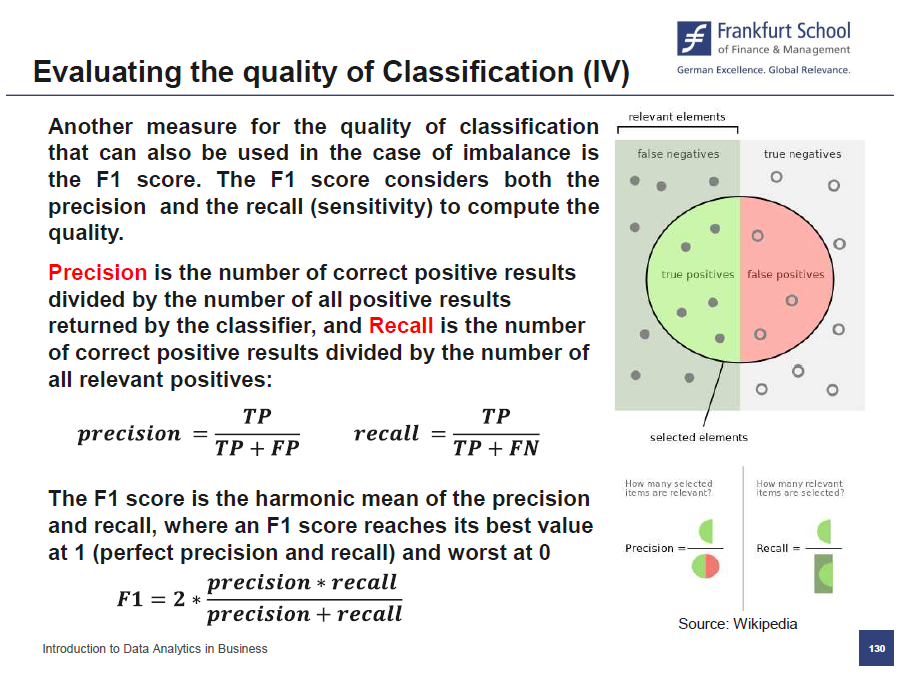

For the best in class models we shall complement accuracy with these metrics. Now we can start our grid search

# Cross Validation Grid Search 

In the case of algorithms having hyperparameters, it makes sense to find the optimal
parameters first and to use them for model fitting. This can be done in Scikit-learn using the
GridSearchCV class. After predefining the grid of parameters, the function analyses the
different alternatives using cross validation.

#### Random Forest CV-GS

We pick the best performing model sofar (Random Forest) for hyperparameter tunning 


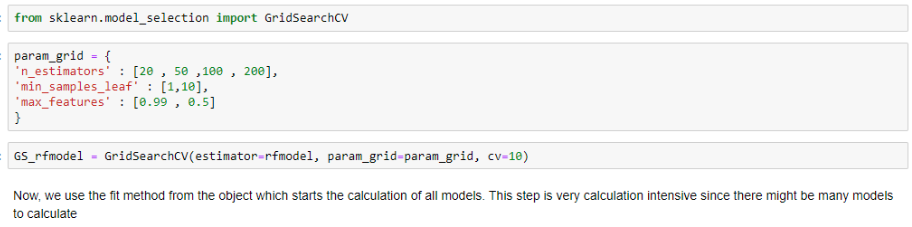

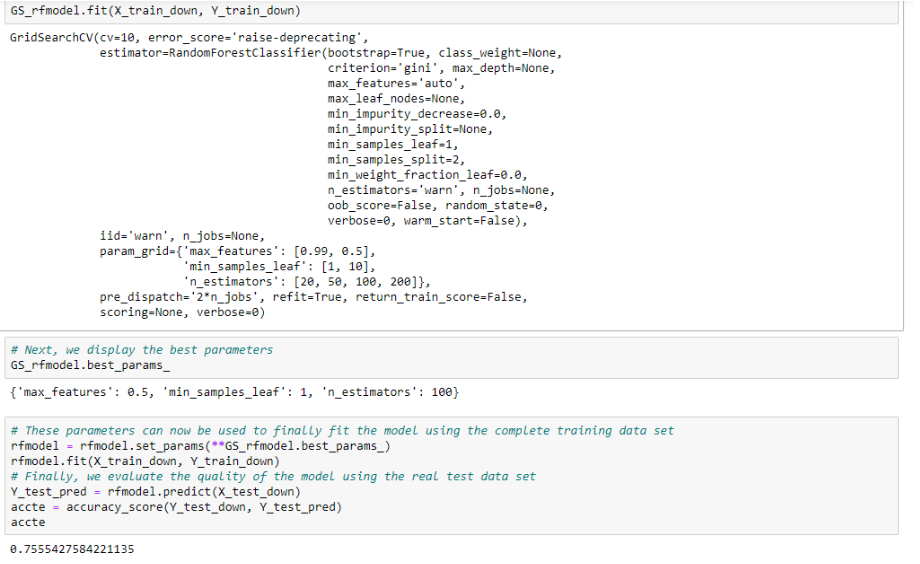

The results of the gridsearch process are stored in a data structure named cv_results_. 
It is an attribute of the model instance. Here we can find the mean accuracies and the corresponding
standard deviations for the different trials

For our report dataframe, we need both values from the model with the best parameters. The number
of the corresponding row is given by the attribute best_index_


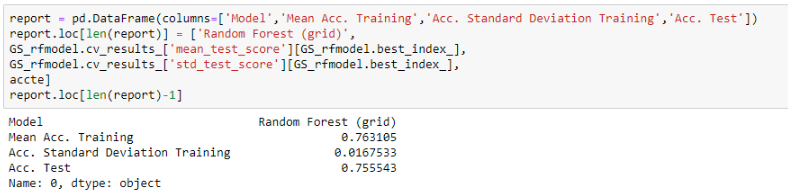

#### SVM grid search

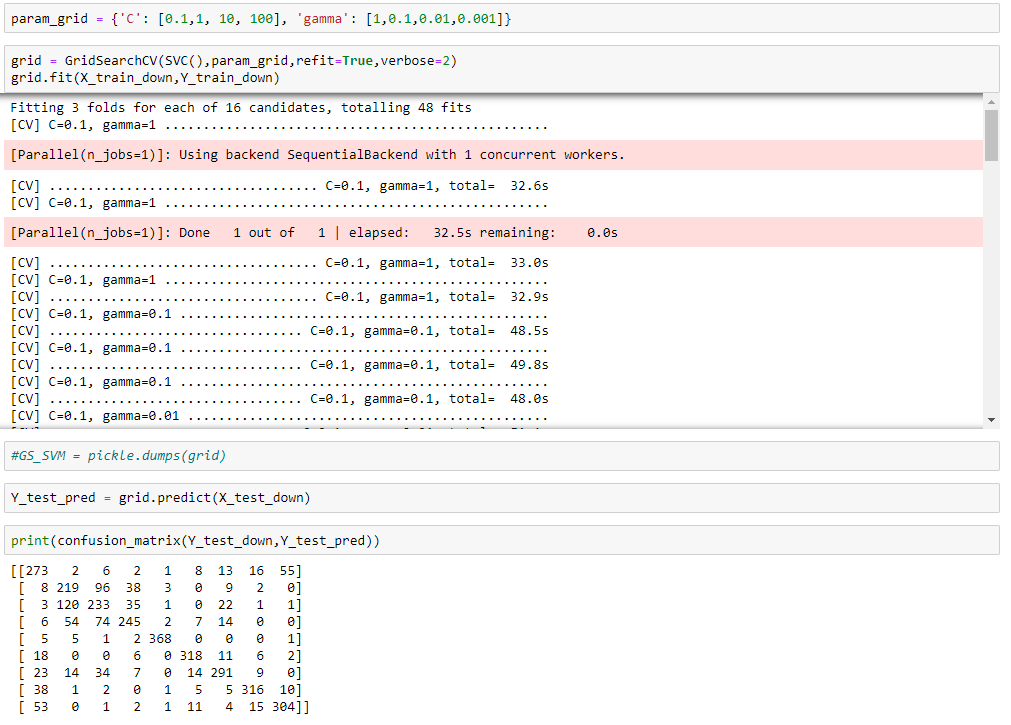

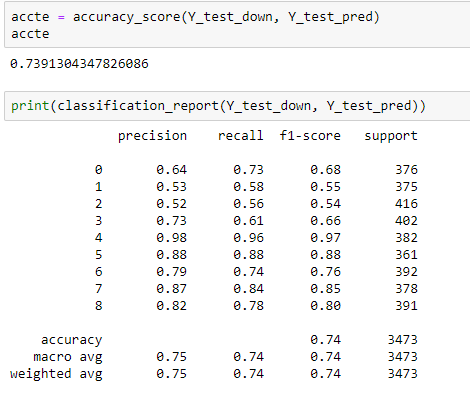

#### Insight

The Performance among the different tested hyperparameter tuned models remained consistent. We tried also on the PC reduced data and had also similar results. To get better results we may need to work more on the data and carry out more data engineering, feature analysis.

# Feature Importance Analysis

We use the random forest model to analyse the feature importance. For that we create a function to return a data frame, showing us which features had the most impact on the result of the predictions. 

In [119]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [120]:
fi = rf_feat_importance(m, X_train_down); fi[:20]

,cols,imp
33,feat_34,0.100661
10,feat_11,0.038059
59,feat_60,0.030989
13,feat_14,0.023622
96,feat_count_non_zero,0.023569
66,feat_67,0.023443
61,feat_62,0.022994
24,feat_25,0.022896
38,feat_39,0.021957
39,feat_40,0.021721


These are the 20 most important features.

In [121]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

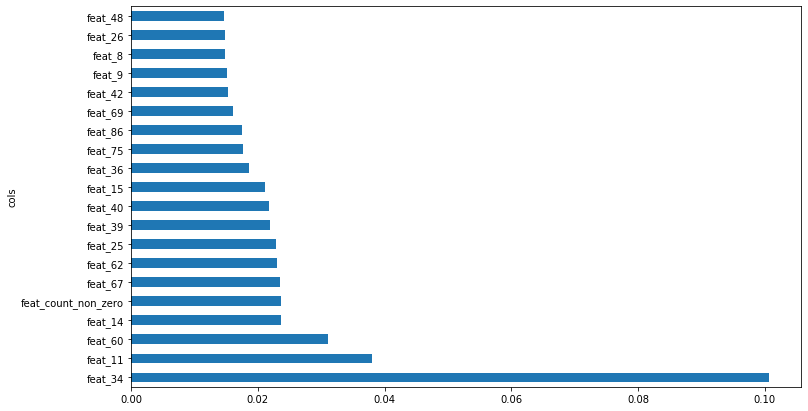

In [122]:
plot_fi(fi[:20]);

Lets see if we can analyse further the 4  apparently most important features 

In [123]:
# We create a df with these features 
df_plot = X_train_down[['feat_34','feat_11','feat_60','feat_25']]
df_plot['labels'] = Y_train_down
df_plot.head(2)

C:\Users\gabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,feat_34,feat_11,feat_60,feat_25,labels
1266,0.000000,0.0,0.0,0.133333,0
59327,0.011905,0.0,0.0,0.200000,8


C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gabri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


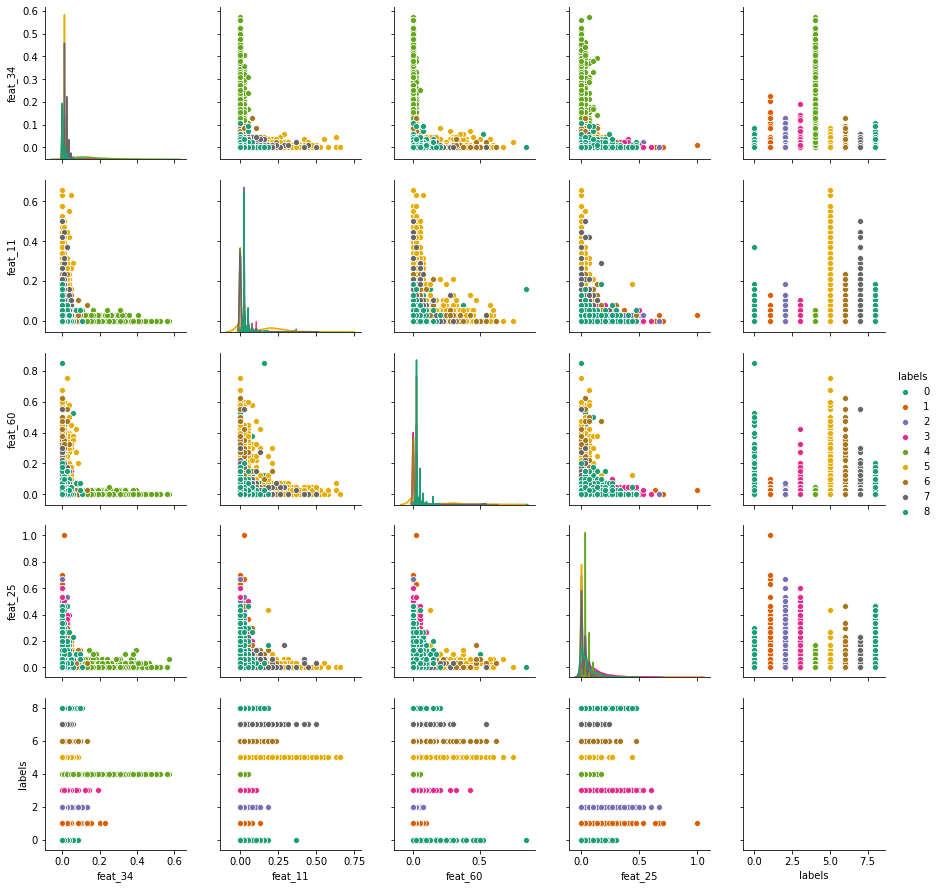

In [124]:
sns.pairplot(df_plot,hue='labels',palette='Dark2')

This pair plot show us which product classes seems to be the most separable given the most important features. Its a lot to take in, so we reduce it only to the most problematic classes, the ones where the had the most misclasification among them. From the confusion matrix we see a pattern that the encoded classes 1, 2 and 8 are the ones confused most. 

In [125]:
#this query filter all other classes out. 
df_plot.loc[df_plot['labels'].isin([1,2,8])]

,feat_34,feat_11,feat_60,feat_25,labels
59327,0.011905,0.0,0.000,0.200000,8
22254,0.000000,0.0,0.000,0.000000,2
16440,0.000000,0.0,0.025,0.366667,1
22577,0.000000,0.0,0.000,0.066667,2
57759,0.000000,0.0,0.000,0.266667,8
...,...,...,...,...,...
25047,0.000000,0.0,0.000,0.100000,2
21850,0.000000,0.0,0.000,0.100000,2
23734,0.000000,0.0,0.000,0.000000,2
22563,0.000000,0.0,0.000,0.100000,2


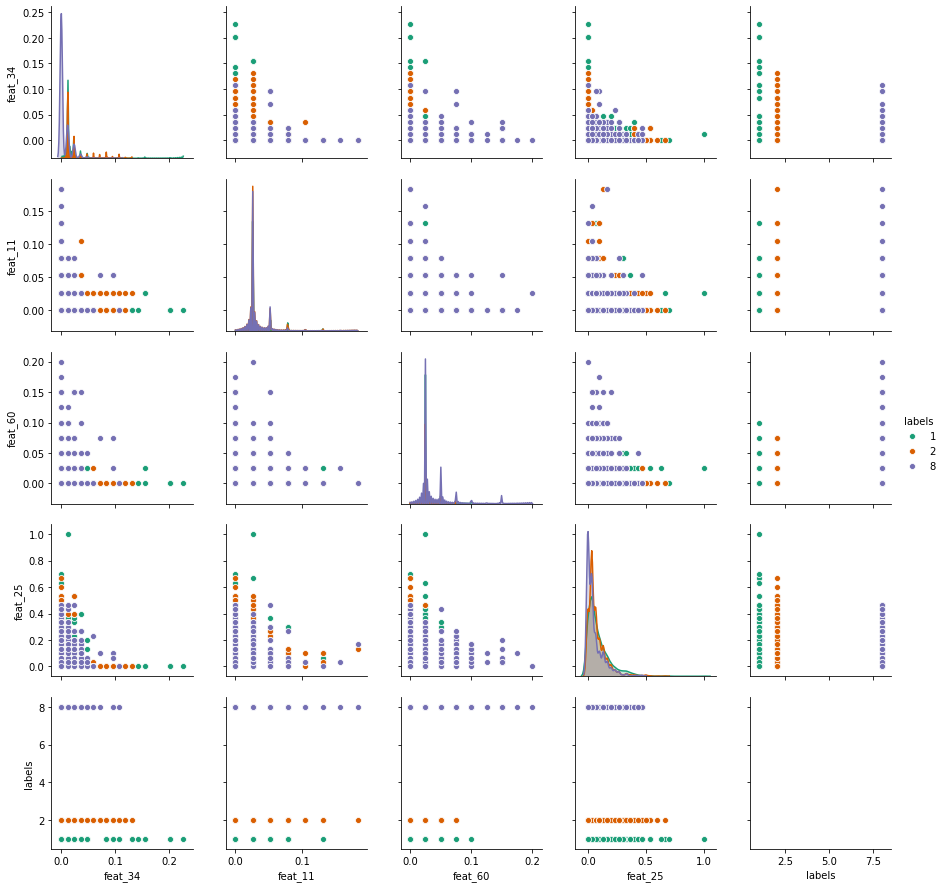

In [126]:
#We plot it again
sns.pairplot(df_plot.loc[df_plot['labels'].isin([1,2,8])],hue='labels',palette='Dark2')

At this granularity we see better how distinguisible these classes given just the selected features.
For example, Label 8 can be rather easily separated given a combinations of values of feat_25 and feature_11 or feature_60

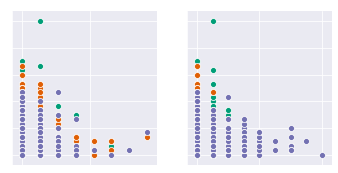

A linear classifier could easily distinguis among 8 and the other two labels. However, label 1 and 2 are not so easily separable. This confirm the resulst of the confusion matrix

# Ensemble Learning

Even if Scikit-learn has functions to build ensemble models, the corresponding functions of
the library mlextend are more powerful and more convenient to use. For building ensemble
classifiers the classes EnsembleVoteClassifier and StackingClassifier can be used. Both will be
the subject of the following description.
As the name suggests, the class EnsembleVoteClassifier offers functions for creating votingbased
ensemble classifiers. It is a meta-classifier for combining similar or conceptually
different machine learning classifiers for classification via majority voting. The
EnsembleVoteClassifier implements hard and soft voting. In hard voting, the final class label is
predicted as the class label that has been predicted most frequently by the classification
models of the ensemble. In soft voting, the class labels are predicted by averaging the classprobabilities
of the ensemble’s models.

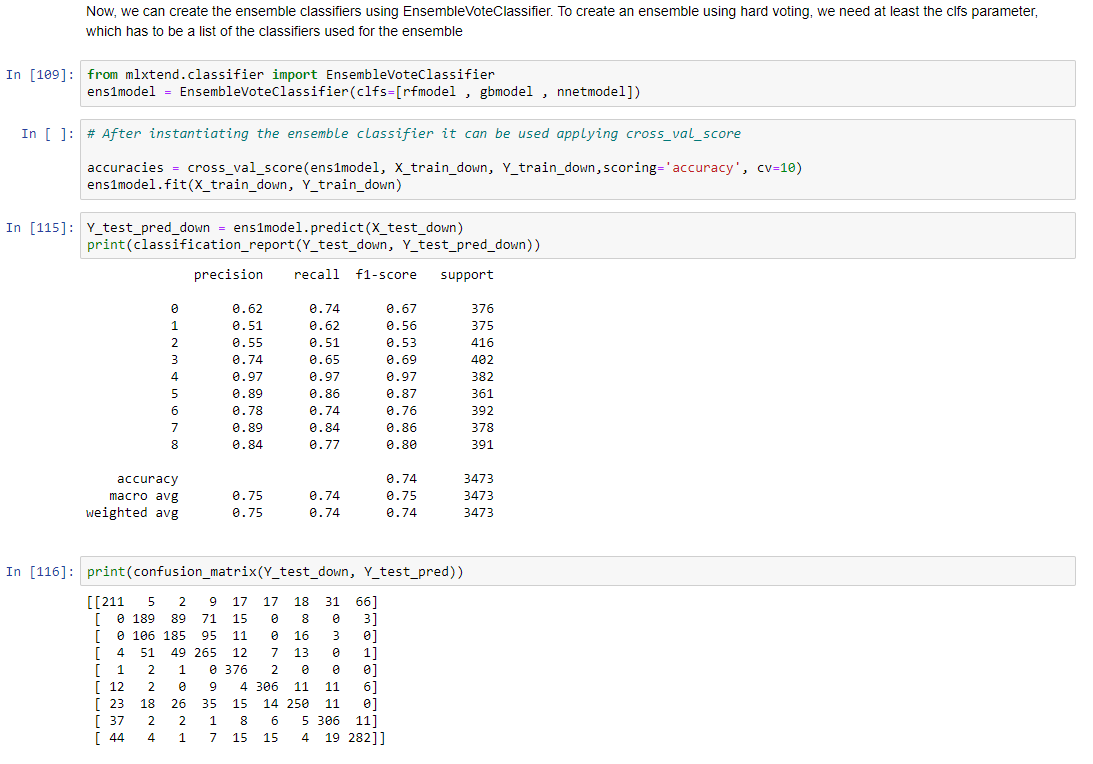

EnsembleVoteClassifier provides the opportunity to set weights for the models

    ens2model = EnsembleVoteClassifier(clfs=[knnmodel, nbmodel, rfmodel],weights=[1,1,2])

But we don't see a reason to do this at the moment

# Lets try stacking ensemble learning 

Stacking is an ensemble learning technique that combines multiple classification models via a
meta-classifier (supervisor). First, the individual classification models are trained based on the
complete training set. Then, the meta-classifier is fitted based on the outputs of the individual
classification models in the ensemble. The meta-classifier can either be trained on the
predicted class labels or probabilities from the ensemble.
To apply stacking, mlextend provide the class StackingClassifier. At first, the classifiers have to
be instantiated. We use the ones from the step before. In the next step, the meta-classifier
must be instantiated. In our case, we use a logistic regression 


In [129]:
from mlxtend.classifier import StackingClassifier

In [130]:
lr_ensemble = LogisticRegression() # this will be the meta classifier

In [131]:
stens1model = StackingClassifier(classifiers=[knnmodel, nbmodel,
 rfmodel], use_probas=True,
 average_probas=False,
 meta_classifier=lr_ensemble)

In [132]:
accuracies = cross_val_score(stens1model, X_train_down, Y_train_down,
 scoring='accuracy', cv=10)

In [133]:
accuracies

array([0.72146447, 0.71408046, 0.70545977, 0.73309353, 0.69114471,
       0.72138229, 0.70986321, 0.72222222, 0.7333815 , 0.73193642])

In [134]:
stens1model.fit(X_train_down, Y_train_down)

StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=7,
                                                     p=2, weights='uniform'),
                                GaussianNB(priors=None, var_smoothing=1e-09),
                                RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_lea...
       

In [135]:
Y_test_pred = stens1model.predict(X_test_down)
accte = accuracy_score(Y_test_down, Y_test_pred)

In [136]:
print(confusion_matrix(Y_test_down, Y_test_pred)) 

[[253   2   5   3   1   8  20  27  57]
 [  1 219  77  48   3   2  21   3   1]
 [  1 100 221  63   2   2  25   1   1]
 [  4  54  53 266   3   4  15   0   3]
 [  1   3   1   1 369   2   1   1   3]
 [ 14   2   2   3   0 305  18  10   7]
 [ 31  13  36  17   5  12 265  12   1]
 [ 37   4   1   0   0   8   6 312  10]
 [ 58   4   2   2   1  18   8  10 288]]


In [137]:
print(classification_report(Y_test_down, Y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       376
           1       0.55      0.58      0.56       375
           2       0.56      0.53      0.54       416
           3       0.66      0.66      0.66       402
           4       0.96      0.97      0.96       382
           5       0.84      0.84      0.84       361
           6       0.70      0.68      0.69       392
           7       0.83      0.83      0.83       378
           8       0.78      0.74      0.76       391

    accuracy                           0.72      3473
   macro avg       0.72      0.72      0.72      3473
weighted avg       0.72      0.72      0.72      3473



# Conclusions

It has been a demanding but equally rewarding journey. We have tested several models with default and custom parameters, on a one stance and using cross validation. We have done feature engineering, dimensionaly reduction, hyper parameter tuning and tried ensembling alltogether. The models have presented consistent result with a maximum accuracy around 80%. We have identified the classes that are consistenly missclassified among all models. We have investigated further online and found a kaggle competition with the same problem. The winners of the competition have used very extense, intrincated and somehow arbitrary or holistic architechtures to achieve better results. 

Instead of picking just one model out of the many as a winner we concluded that more analysis could be undertaken before going into production. Things we would analyse but left out due to knowledge, time or computation constrains are: 

    -Standardizing the data instead of normalizing 
    -Use deep learning architechture 
    -t-distributed Stochastic Neighbor Embedding (did it but did not know how to interprete results)
    -Self organizing maps
    
    
    